<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/6_Regresi%C3%B3n_Lineal__Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargar archivo csv desde equipo
#from google.colab import files
#files.upload()

In [4]:
#df= pd.read_csv("car_crashes.csv")
#df

In [ ]:
#Cargar archivo csv desde seaborn
df=sns.load_dataset(name='car_crashes')
df.head(5)

<Axes: xlabel='alcohol', ylabel='total'>

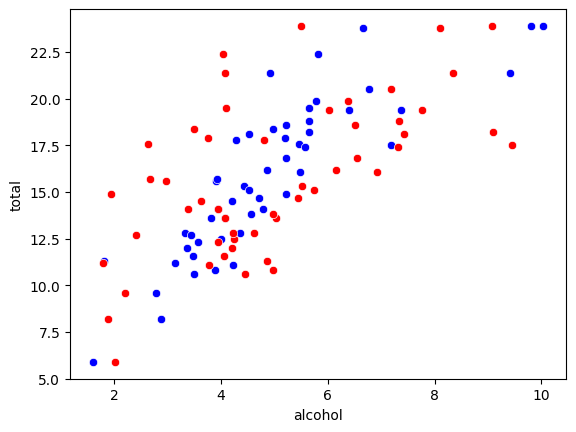

In [4]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alcohol) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='speeding', y='total', color="red", data=df)

In [5]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df[['alcohol']]
Var_Dep= df['total']

In [ ]:
#Se define model como la función de regresión lineal
#%pip install scikit learn
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [11]:
%pip install scikit-learn

In [15]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [12]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': np.float64(5.857776154826299)}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [20]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7269492966665405

In [14]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['alcohol']])
y_pred

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734,
       13.59756016, 13.76016066, 15.73575679,  9.0955587 , 16.40851638,
       13.78455074, 20.44100889, 14.87600663, 14.70324359, 14.40446516,
       13.8353634 , 14.54064309, 15.86177218, 19.6076813 , 15.06502971,
       13.98780137, 11.69106925, 13.88211104, 11.5162737 , 16.94713055,
       16.98371566, 24.99585551, 16.45729653, 15.41868581, 12.93089809,
       12.23171592, 15.95526747, 13.10772614, 16.44306899, 26.26007443,
       15.60161138, 17.58737003, 12.62195713, 17.32517672, 14.43088774,
       25.77430543, 18.86988151, 17.3515993 , 20.84141263,  9.53254755,
       14.15040187, 12.82724027, 12.96748321, 19.40239816, 15.11380986,
       17.17477126])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

<Axes: xlabel='alcohol', ylabel='total'>

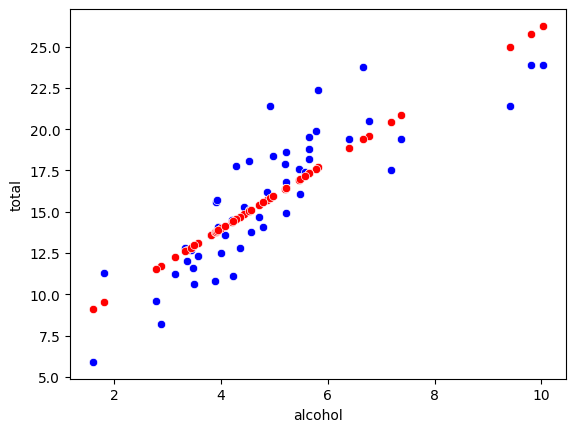

In [16]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='alcohol', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [17]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7269492966665405

In [18]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.8526132163334911)

In [19]:
#Eliminamos la columna tipo string
df= df.drop(['abbrev'], axis=1)

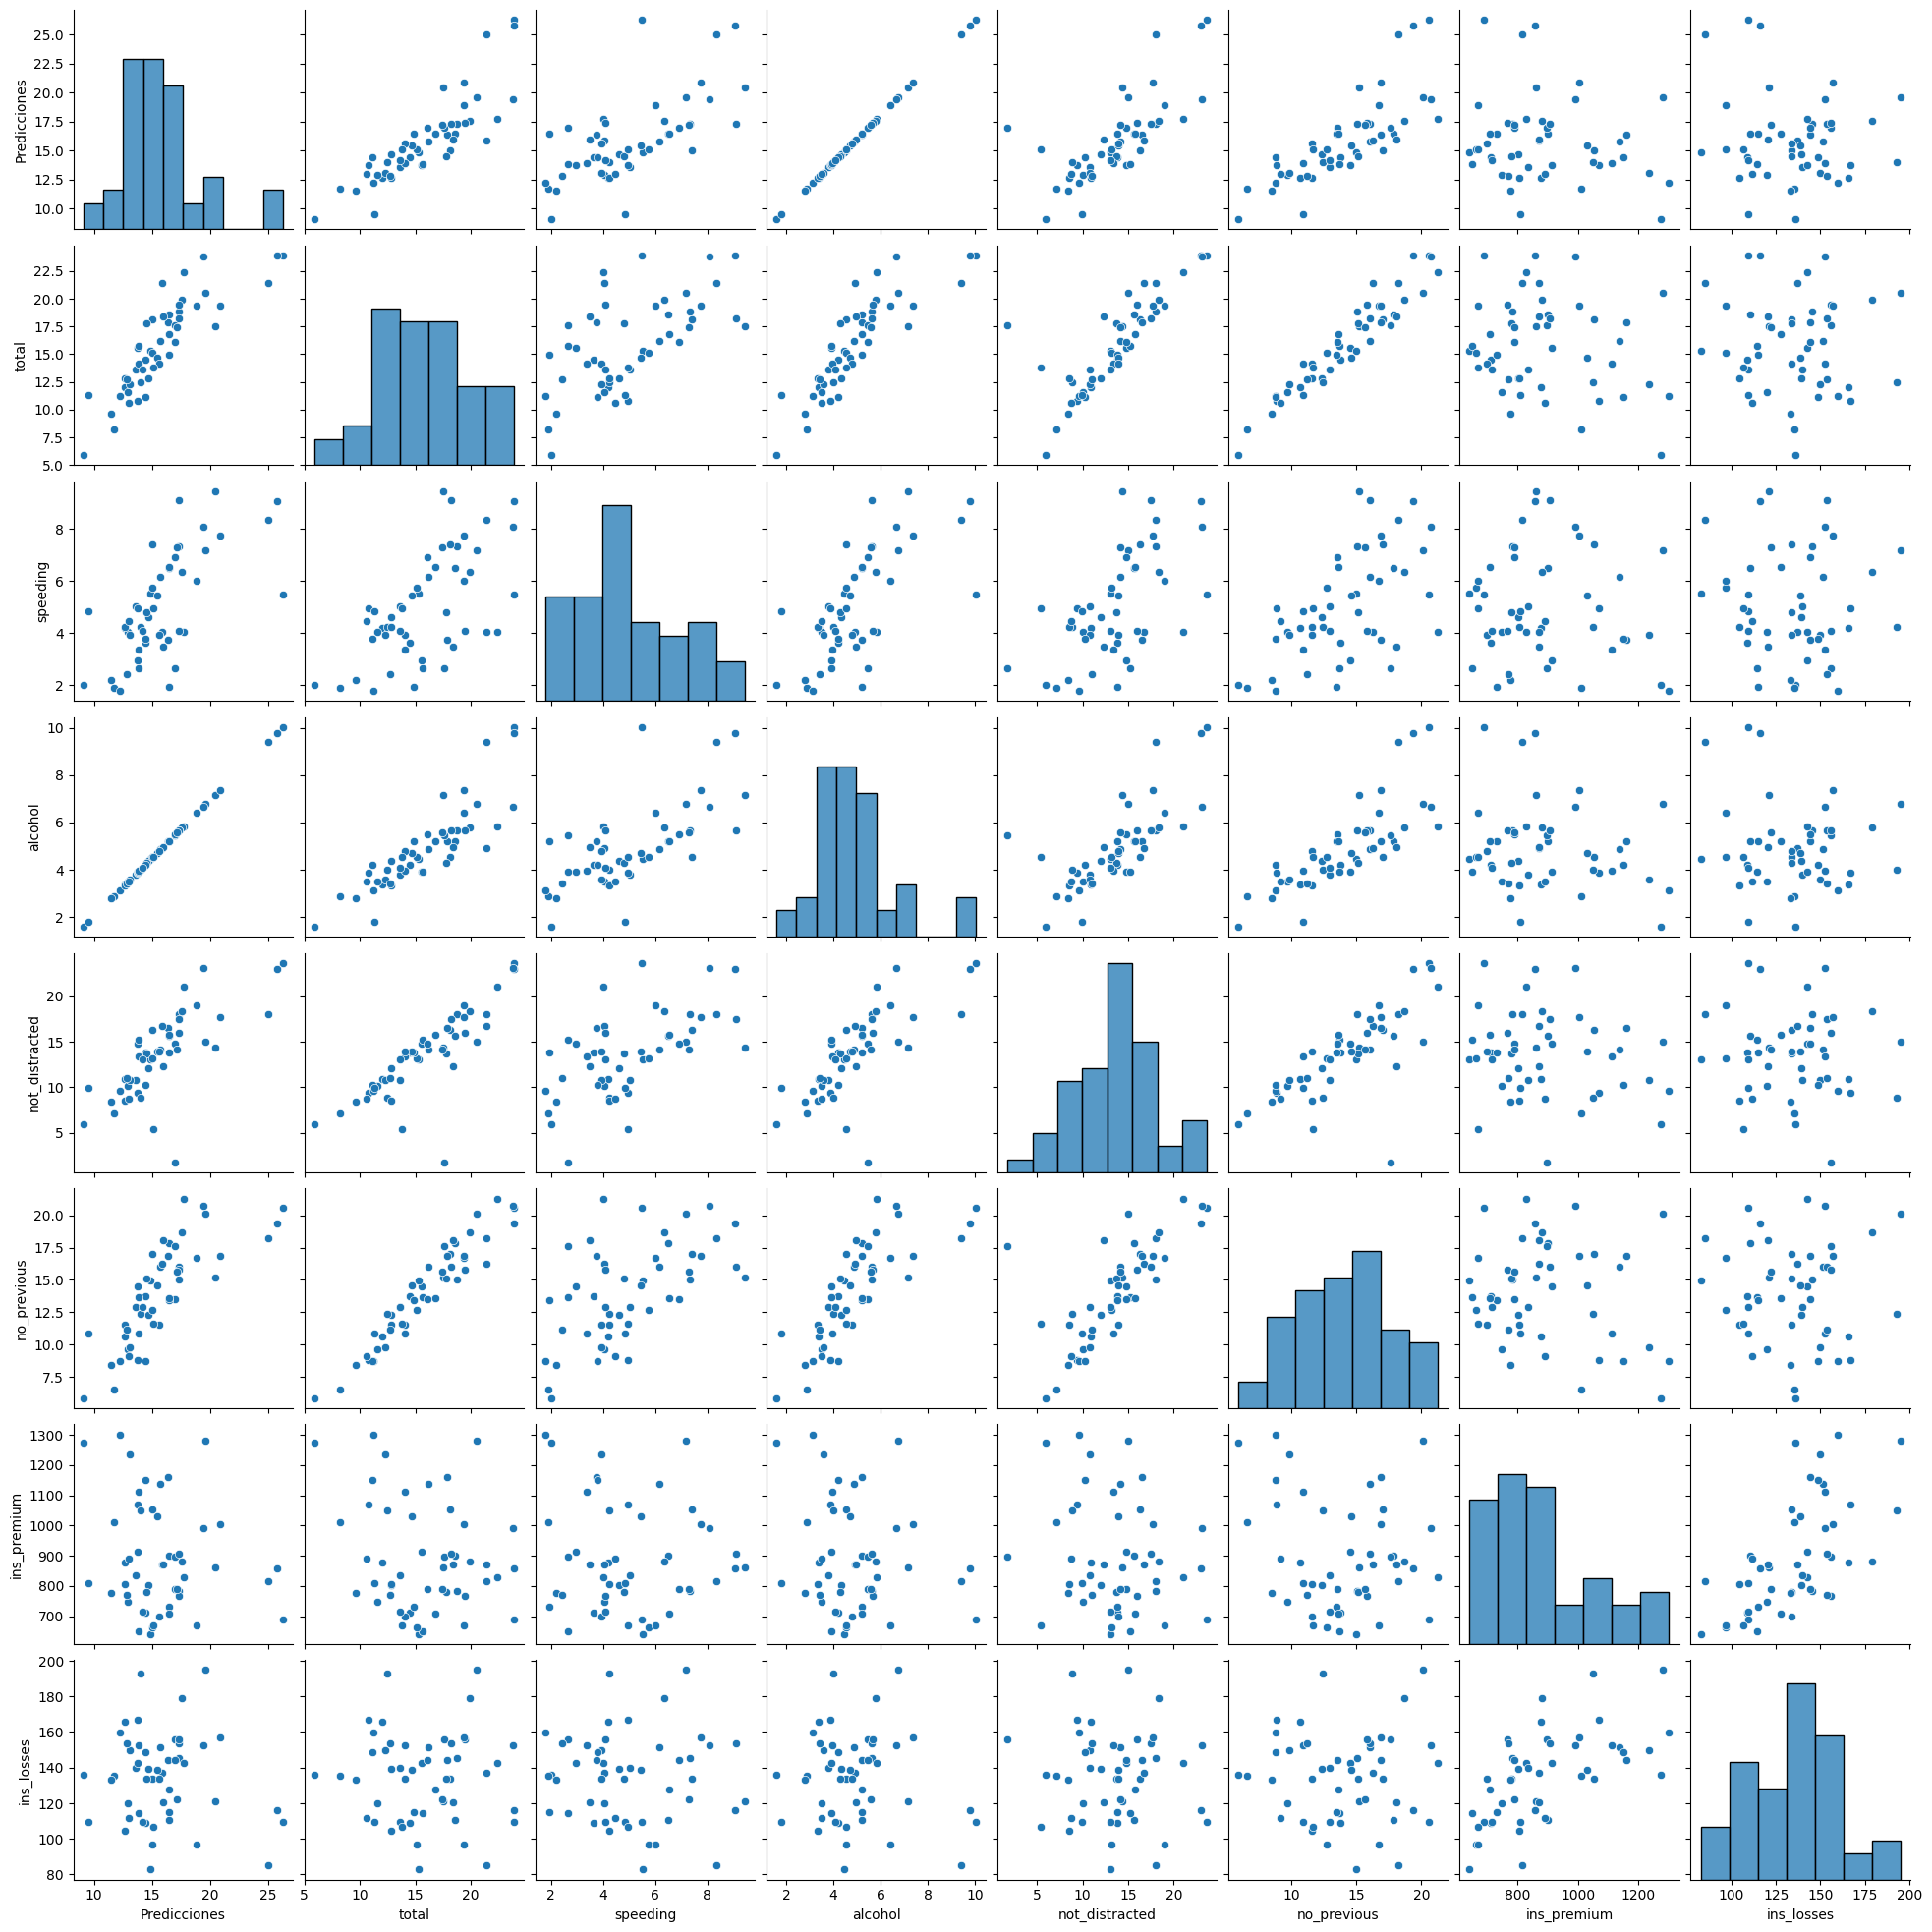

In [20]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [ ]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df.corr()
Corr_Factors

In [22]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
Predicciones,1.000000,0.852613,0.669719,1.000000,0.732816,0.783520,0.170612,0.112547
total,0.852613,1.000000,0.611548,0.852613,0.827560,0.956179,0.199702,0.036011
speeding,0.669719,0.611548,1.000000,0.669719,0.588010,0.571976,0.077675,0.065928
alcohol,1.000000,0.852613,0.669719,1.000000,0.732816,0.783520,0.170612,0.112547
not_distracted,0.732816,0.827560,0.588010,0.732816,1.000000,0.747307,0.174856,0.075970
no_previous,0.783520,0.956179,0.571976,0.783520,0.747307,1.000000,0.156895,0.006359
ins_premium,0.170612,0.199702,0.077675,0.170612,0.174856,0.156895,1.000000,0.623116
ins_losses,0.112547,0.036011,0.065928,0.112547,0.075970,0.006359,0.623116,1.000000


In [ ]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

<Axes: >

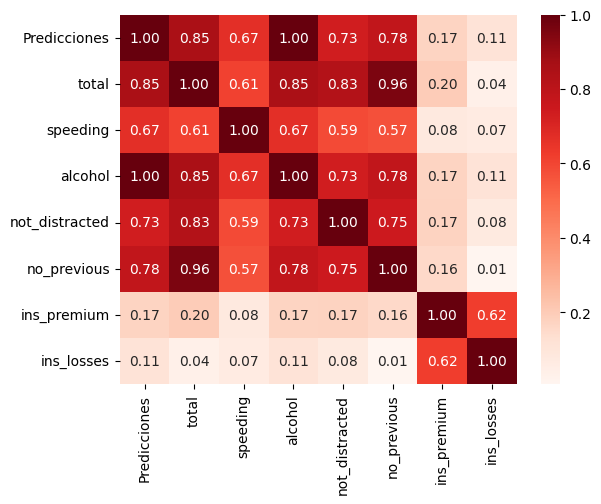

In [25]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'Reds', annot=True, fmt=".2f")  
Heat_Map